# 聚类 Clustering
## K-means算法

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
import time

### 从零实现K-means算法

数据集形状: (1000, 2)


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaV

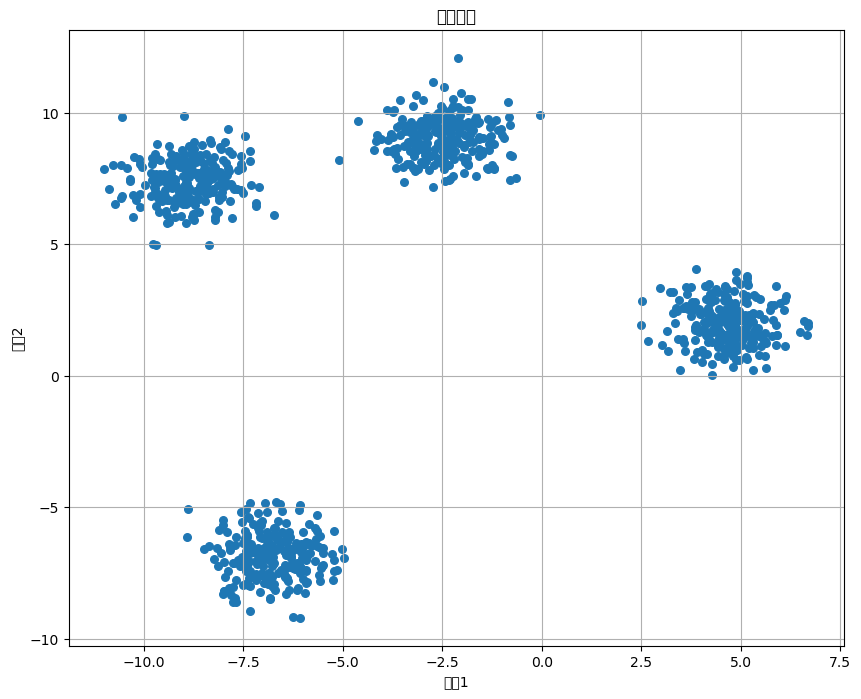

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24815 (\N{CJK UNIFIED IDEOGRAPH-60EF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31751 (\N{CJK UNIFIED IDEOGRAPH-7C07}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from font(s) DejaV

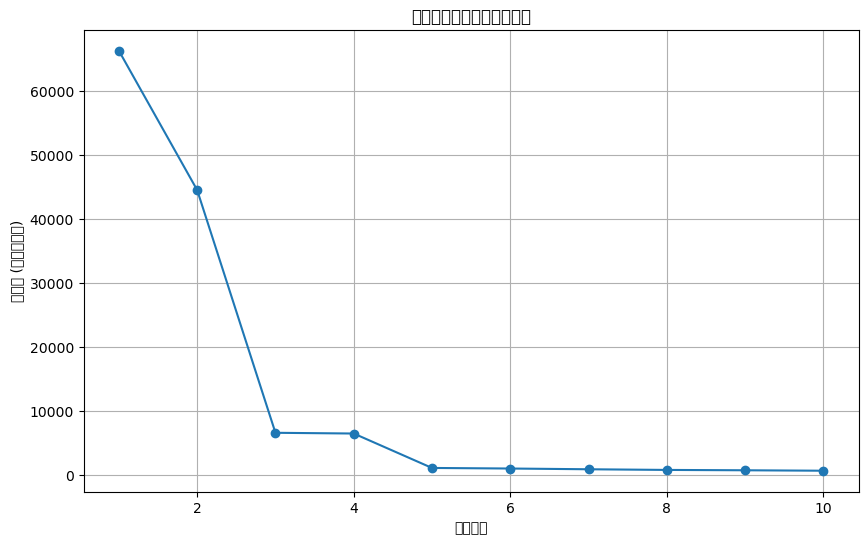

/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_24491/3766356276.py:233: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors(k), marker='o', s=30, label=f'簇 {k+1}')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/py

训练用时: 0.0025 秒
迭代次数: 9
惯性值: 6506.8747


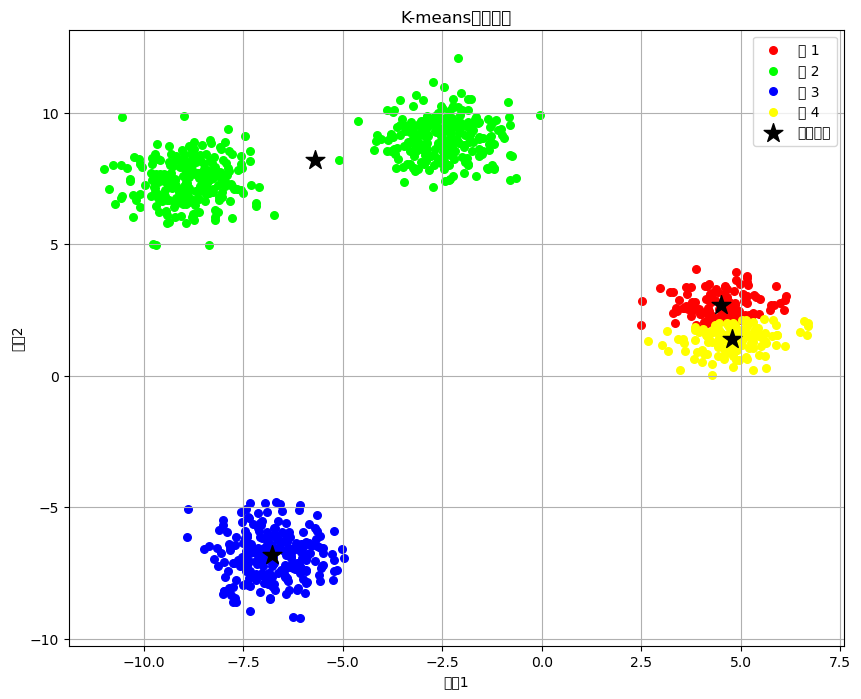

/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_24491/3766356276.py:300: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors(k), marker='o', s=30)
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_24491/3766356276.py:309: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_24491/3766356276.py:309: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_24491/3766356276.py:309: UserWarning: Glyph 

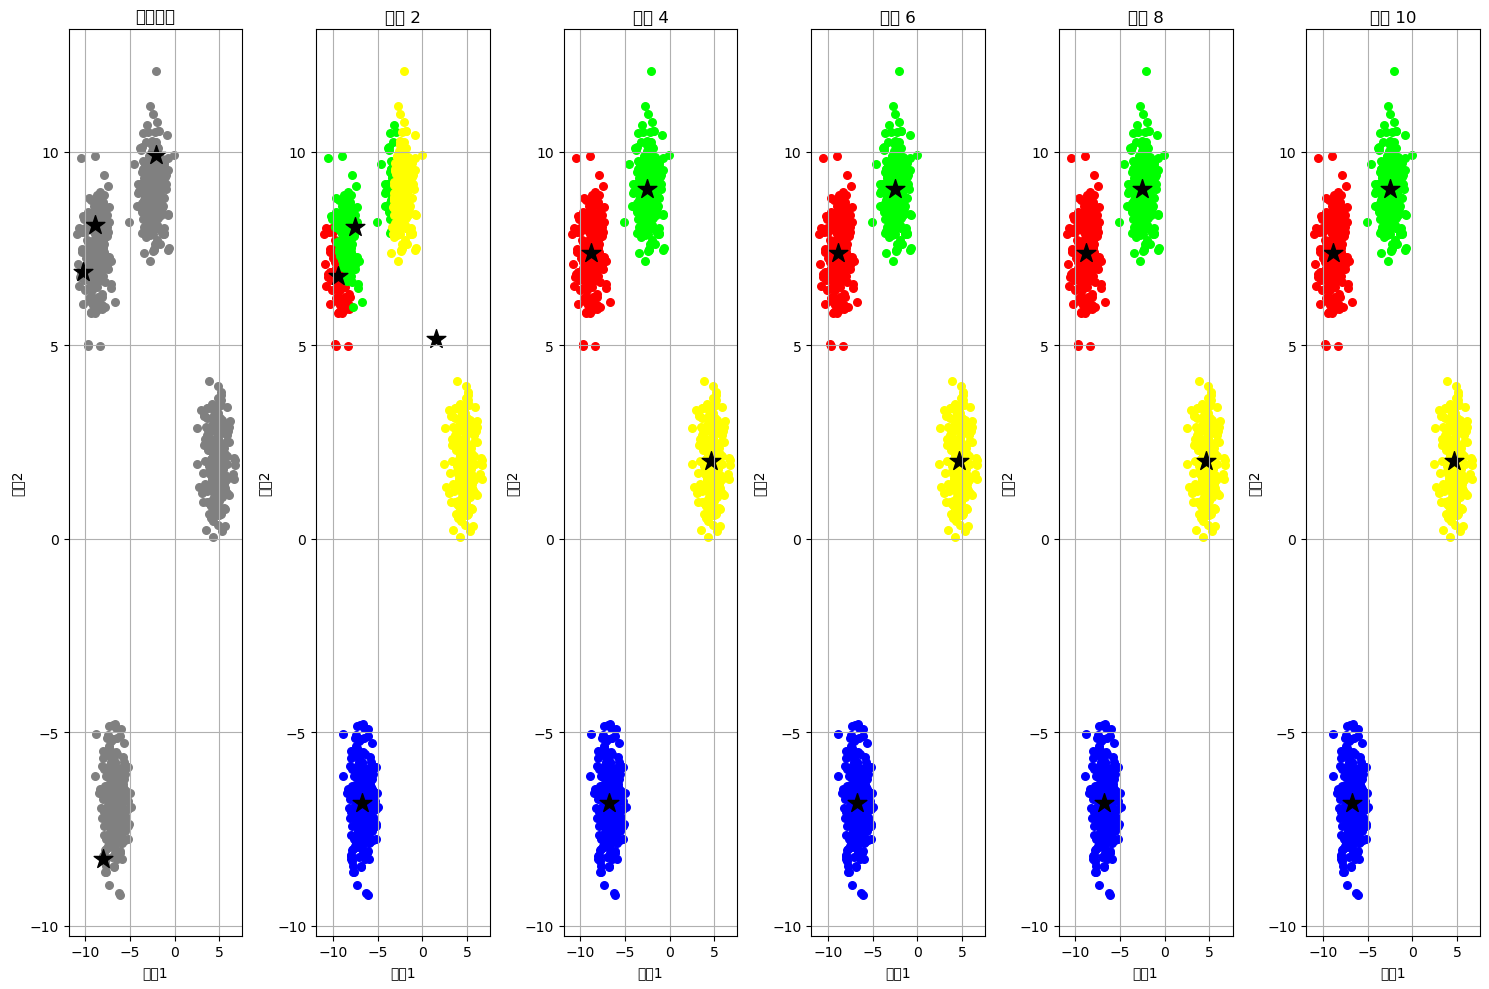


新数据点:
[[2.00403283 3.77110945]
 [9.06160298 6.26328268]
 [6.2166564  9.26290258]
 [6.67615472 8.6384457 ]
 [3.66796237 5.32538771]]

预测结果:
[0 0 0 0 0]


In [ ]:
class KMeans:
    """
    K-means聚类算法的简单实现
    """
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4, random_state=None):
        """
        初始化K-means参数
        
        Parameters:
        -----------
        n_clusters : int, default=3
            聚类的数量
        max_iter : int, default=100
            最大迭代次数
        tol : float, default=1e-4
            中心点变化的容忍度，小于此值时停止迭代
        random_state : int, default=None
            随机数种子
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        
        # 聚类中心点
        self.centroids = None
        # 每个样本所属的簇
        self.labels_ = None
        # 每次迭代的误差
        self.inertia_ = None
        # 迭代次数
        self.n_iter_ = None
    
    def _init_centroids(self, X):
        """
        初始化聚类中心点
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            训练数据
            
        Returns:
        --------
        centroids : array, shape (n_clusters, n_features)
            初始化的聚类中心点
        """
        np.random.seed(self.random_state)
        # 随机从数据集中选择n_clusters个样本点作为初始中心点
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids
    
    def _compute_distance(self, X, centroids):
        """
        计算每个样本点到每个聚类中心的距离
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            数据点
        centroids : array, shape (n_clusters, n_features)
            聚类中心点
            
        Returns:
        --------
        distances : array, shape (n_samples, n_clusters)
            每个样本点到每个聚类中心的距离
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            # 计算欧氏距离
            distances[:, k] = np.sqrt(np.sum((X - centroids[k])**2, axis=1))
        return distances
    
    def _assign_clusters(self, distances):
        """
        将样本点分配到最近的聚类中心
        
        Parameters:
        -----------
        distances : array, shape (n_samples, n_clusters)
            每个样本点到每个聚类中心的距离
            
        Returns:
        --------
        labels : array, shape (n_samples,)
            每个样本点所属的簇标签
        """
        # 找到距离最小的簇
        labels = np.argmin(distances, axis=1)
        return labels
    
    def _update_centroids(self, X, labels):
        """
        更新聚类中心点
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            数据点
        labels : array, shape (n_samples,)
            每个样本点所属的簇标签
            
        Returns:
        --------
        centroids : array, shape (n_clusters, n_features)
            更新后的聚类中心点
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            # 如果该簇中有样本点，则更新中心点为该簇所有样本点的均值
            if np.sum(labels == k) > 0:
                centroids[k] = np.mean(X[labels == k], axis=0)
        return centroids
    
    def _compute_inertia(self, X, labels, centroids):
        """
        计算每个簇内样本点到簇中心的距离平方和（惯性/SSE）
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            数据点
        labels : array, shape (n_samples,)
            每个样本点所属的簇标签
        centroids : array, shape (n_clusters, n_features)
            聚类中心点
            
        Returns:
        --------
        inertia : float
            所有簇内样本点到簇中心的距离平方和
        """
        inertia = 0
        for k in range(self.n_clusters):
            if np.sum(labels == k) > 0:
                inertia += np.sum((X[labels == k] - centroids[k])**2)
        return inertia
    
    def fit(self, X):
        """
        拟合K-means模型
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            训练数据
            
        Returns:
        --------
        self : object
            返回self
        """
        # 初始化聚类中心点
        self.centroids = self._init_centroids(X)
        
        # 初始化迭代次数
        self.n_iter_ = 0
        
        # 开始迭代
        for i in range(self.max_iter):
            self.n_iter_ += 1
            
            # 计算距离
            distances = self._compute_distance(X, self.centroids)
            
            # 分配簇
            self.labels_ = self._assign_clusters(distances)
            
            # 更新聚类中心点
            new_centroids = self._update_centroids(X, self.labels_)
            
            # 计算中心点变化程度
            shift = np.sum(np.sqrt(np.sum((new_centroids - self.centroids)**2, axis=1)))
            
            # 更新中心点
            self.centroids = new_centroids
            
            # 如果中心点变化很小，则停止迭代
            if shift < self.tol:
                break
        
        # 计算惯性
        self.inertia_ = self._compute_inertia(X, self.labels_, self.centroids)
        
        return self
    
    def predict(self, X):
        """
        预测新数据点所属的簇
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            新数据点
            
        Returns:
        --------
        labels : array, shape (n_samples,)
            每个样本点所属的簇标签
        """
        # 计算距离
        distances = self._compute_distance(X, self.centroids)
        
        # 分配簇
        labels = self._assign_clusters(distances)
        
        return labels


def plot_kmeans_result(X, kmeans, title="K-means聚类结果"):
    """
    可视化K-means聚类结果
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        数据点
    kmeans : KMeans
        训练好的KMeans模型
    title : str, default="K-means聚类结果"
        图表标题
    """
    # 不同簇的颜色
    colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800000', '#008000', '#000080', '#808000'])
    
    plt.figure(figsize=(10, 8))
    
    # 绘制数据点
    for k in range(kmeans.n_clusters):
        cluster_points = X[kmeans.labels_ == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors(k), marker='o', s=30, label=f'簇 {k+1}')
    
    # 绘制聚类中心
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='*', s=200, label='聚类中心')
    
    plt.title(title)
    plt.xlabel('特征1')
    plt.ylabel('特征2')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_kmeans_progress(X, n_clusters, max_iter=10, interval=1):
    """
    可视化K-means聚类过程
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        数据点
    n_clusters : int
        聚类的数量
    max_iter : int, default=10
        最大迭代次数
    interval : int, default=1
        每隔几次迭代可视化一次
    """
    # 不同簇的颜色
    colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800000', '#008000', '#000080', '#808000'])
    
    # 初始化聚类模型
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1)
    
    # 初始化聚类中心点
    kmeans.centroids = kmeans._init_centroids(X)
    
    plt.figure(figsize=(15, 10))
    
    # 绘制初始状态
    plt.subplot(1, max_iter//interval + 1, 1)
    plt.title('初始状态')
    plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', s=30)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='*', s=200)
    plt.xlabel('特征1')
    plt.ylabel('特征2')
    plt.grid(True)
    
    # 进行迭代
    for i in range(max_iter):
        # 计算距离
        distances = kmeans._compute_distance(X, kmeans.centroids)
        
        # 分配簇
        labels = kmeans._assign_clusters(distances)
        
        # 更新聚类中心点
        kmeans.centroids = kmeans._update_centroids(X, labels)
        
        # 每隔interval次迭代可视化一次
        if (i + 1) % interval == 0:
            plt.subplot(1, max_iter//interval + 1, (i + 1)//interval + 1)
            plt.title(f'迭代 {i+1}')
            
            # 绘制数据点
            for k in range(n_clusters):
                cluster_points = X[labels == k]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors(k), marker='o', s=30)
            
            # 绘制聚类中心
            plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='*', s=200)
            
            plt.xlabel('特征1')
            plt.ylabel('特征2')
            plt.grid(True)
    
    plt.tight_layout()
    plt.show()


def elbow_method(X, max_clusters=10):
    """
    使用肘部法则确定最佳聚类数量
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        数据点
    max_clusters : int, default=10
        最大聚类数量
        
    Returns:
    --------
    inertia_list : list
        不同聚类数量下的惯性值
    """
    inertia_list = []
    
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X)
        inertia_list.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia_list, marker='o', linestyle='-')
    plt.title('肘部法则确定最佳聚类数量')
    plt.xlabel('聚类数量')
    plt.ylabel('惯性值 (簇内平方和)')
    plt.grid(True)
    plt.show()
    
    return inertia_list


# 主函数
def main():
    # 设置随机种子
    np.random.seed(42)
    
    # 生成示例数据集
    n_samples = 1000
    n_features = 2
    n_clusters = 4
    
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, 
                       cluster_std=0.8, random_state=42)
    
    print(f"数据集形状: {X.shape}")
    
    # 可视化原始数据
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30)
    plt.title('原始数据')
    plt.xlabel('特征1')
    plt.ylabel('特征2')
    plt.grid(True)
    plt.show()
    
    # 使用肘部法则确定最佳聚类数量
    elbow_method(X, max_clusters=10)
    
    # 创建并训练K-means模型
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    end_time = time.time()
    
    print(f"训练用时: {end_time - start_time:.4f} 秒")
    print(f"迭代次数: {kmeans.n_iter_}")
    print(f"惯性值: {kmeans.inertia_:.4f}")
    
    # 可视化聚类结果
    plot_kmeans_result(X, kmeans)
    
    # 可视化聚类过程
    plot_kmeans_progress(X, n_clusters=n_clusters, max_iter=10, interval=2)
    
    # 使用我们的模型预测新数据点的簇
    new_points = np.random.rand(5, 2) * 10
    print("\n新数据点:")
    print(new_points)
    
    labels = kmeans.predict(new_points)
    print("\n预测结果:")
    print(labels)


if __name__ == "__main__":
    main()